In [2]:
# Pseudocode:
# Load the necessary libraries
# Read the dataset into a Pandas DataFrame
# Filter the dataset to include only non-fraudulent transactions
# Train a One-Class SVM on this filtered dataset
# Predict "grey area transactions" as those where the One-Class SVM predicts an anomaly

# Python code:
import pandas as pd
from sklearn.svm import OneClassSVM

In [46]:
# Load the dataset
data1 = pd.read_csv('creditcard.csv')

In [28]:
data1.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [29]:
## Take some sample of the data

data= data1.sample(frac = 0.1,random_state=1)

data.shape

(28481, 31)

In [30]:
# Filter out non-fraudulent transactions
non_fraud = data[data['Class'] == 0]
non_fraud.shape

(28432, 31)

In [31]:
# Feature selection: Exclude 'Time' and 'Class' for training the model
X_non_fraud = non_fraud.drop(['Time', 'Class'], axis=1)
print('done1')

# Initialize One-Class SVM model
# Note: You'll need to adjust 'nu' parameter which is an upper bound on the fraction of training errors
# and a lower bound of the fraction of support vectors.
one_class_svm_non_fraud = OneClassSVM(kernel='rbf', gamma='auto', nu=0.01)
print('done2')

# Train the model
one_class_svm_non_fraud.fit(X_non_fraud)
print('done3')

# Predict using the trained model (1 for inliers, -1 for outliers)
# Here, we're using the entire dataset for prediction to find "grey area transactions"
predictions = one_class_svm_non_fraud.predict(data.drop(['Time', 'Class'], axis=1))
data['Grey_Non_Fraud'] = predictions
print('done4')


done1
done2
done3
done4


In [56]:
predictions.shape

(28481,)

In [59]:
# Count the number of "grey area transactions"
grey_area_count = (data['Grey_Non_Fraud'] == -1).sum()

# Print the number of "grey area transactions"
print(f'Number of "grey area transactions": {grey_area_count}')


Number of "grey area transactions": 1734


In [75]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V25,V26,V27,V28,Amount,Class,Grey_Non_Fraud,SVM_Predicted_Class,Grey_Fraud,SVM_Fraud_Pred
169876,119907.0,-0.611712,-0.769705,-0.149759,-0.224877,2.028577,-2.019887,0.292491,-0.523020,0.358468,...,-2.220686,-0.201146,0.066501,0.221180,1.79,0,1,0,-1,1
127467,78340.0,-0.814682,1.319219,1.329415,0.027273,-0.284871,-0.653985,0.321552,0.435975,-0.704298,...,-0.261034,0.080621,0.162427,0.059456,1.98,0,1,0,-1,1
137900,82382.0,-0.318193,1.118618,0.969864,-0.127052,0.569563,-0.532484,0.706252,-0.064966,-0.463271,...,-0.018148,0.121679,0.249050,0.092516,0.89,0,1,0,-1,1
21513,31717.0,-1.328271,1.018378,1.775426,-1.574193,-0.117696,-0.457733,0.681867,-0.031641,0.383872,...,0.232829,0.814177,0.098797,-0.004273,15.98,0,1,0,-1,1
134700,80923.0,1.276712,0.617120,-0.578014,0.879173,0.061706,-1.472002,0.373692,-0.287204,-0.084482,...,0.552170,0.370701,-0.034255,0.041709,0.76,0,1,0,-1,1


In [78]:
grey_area = (data['Class'] == 1 and data['Grey_Non_Fraud'] == -1)
filtered_data = data[grey_area]

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [77]:
filtered_data.shape

(49, 35)

In [33]:
data['SVM_Predicted_Class'] = data['Grey_Non_Fraud'].apply(lambda x: 1 if x == -1 else 0)

# Actual class labels of the entire dataset
Y_true = data['Class']

# Predicted class labels from One-Class SVM
Y_pred_svm = data['SVM_Predicted_Class']

# Calculate the accuracy score for the One-Class SVM
svm_accuracy = accuracy_score(Y_true, Y_pred_svm)

# Generate a classification report for the One-Class SVM
svm_class_report = classification_report(Y_true, Y_pred_svm)

# Print the accuracy score and classification report
print(f'Accuracy Score for One-Class SVM: {svm_accuracy:.4f}')
print('Classification Report for One-Class SVM:')
print(svm_class_report)

Accuracy Score for One-Class SVM: 0.9403
Classification Report for One-Class SVM:
              precision    recall  f1-score   support

           0       1.00      0.94      0.97     28432
           1       0.02      0.86      0.05        49

    accuracy                           0.94     28481
   macro avg       0.51      0.90      0.51     28481
weighted avg       1.00      0.94      0.97     28481



In [1]:
# Calculate the total number of "grey area transactions" where the prediction is -1 (outliers marked as 1)
total_grey_area_transactions = (data['SVM_Predicted_Class'] == 1).sum()

# Find the total number of fraudulent transactions in the dataset
total_fraudulent_transactions = (data['Class'] == 1).sum()

# Calculate the percentage of "grey area transactions" relative to the total number of fraudulent transactions
percentage_grey_area_transactions = (total_grey_area_transactions / total_fraudulent_transactions) 

# Print the total and the percentage of "grey area transactions"
print(f'Total number of "grey area transactions": {total_grey_area_transactions}')
print(f'Percentage of "grey area transactions" relative to total fraudulent transactions: {percentage_grey_area_transactions:.2f}%')


NameError: name 'data' is not defined

In [35]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V23,V24,V25,V26,V27,V28,Amount,Class,Grey_Non_Fraud,SVM_Predicted_Class
169876,119907.0,-0.611712,-0.769705,-0.149759,-0.224877,2.028577,-2.019887,0.292491,-0.523020,0.358468,...,0.380739,0.023440,-2.220686,-0.201146,0.066501,0.221180,1.79,0,1,0
127467,78340.0,-0.814682,1.319219,1.329415,0.027273,-0.284871,-0.653985,0.321552,0.435975,-0.704298,...,0.090660,0.401147,-0.261034,0.080621,0.162427,0.059456,1.98,0,1,0
137900,82382.0,-0.318193,1.118618,0.969864,-0.127052,0.569563,-0.532484,0.706252,-0.064966,-0.463271,...,-0.123884,-0.495687,-0.018148,0.121679,0.249050,0.092516,0.89,0,1,0
21513,31717.0,-1.328271,1.018378,1.775426,-1.574193,-0.117696,-0.457733,0.681867,-0.031641,0.383872,...,-0.239197,0.009967,0.232829,0.814177,0.098797,-0.004273,15.98,0,1,0
134700,80923.0,1.276712,0.617120,-0.578014,0.879173,0.061706,-1.472002,0.373692,-0.287204,-0.084482,...,-0.076738,0.258708,0.552170,0.370701,-0.034255,0.041709,0.76,0,1,0


In [36]:
# Pseudocode:
# Filter the dataset to include only fraudulent transactions
# Train a One-Class SVM on this filtered dataset
# Predict "grey area transactions" as those where the One-Class SVM predicts an anomaly

# Python code:
# Filter out fraudulent transactions
fraud = data[data['Class'] == 1]
print('done1')

# Feature selection: Exclude 'Time' and 'Class' for training the model
X_fraud = fraud.drop(['Time', 'Class'], axis=1)
print('done2')

# Initialize One-Class SVM model
one_class_svm_fraud = OneClassSVM(kernel='rbf', gamma='auto', nu=0.01)
print('done3')

# Train the model on fraudulent data
one_class_svm_fraud.fit(X_fraud)
print('done4')

# Predict using the trained model (1 for inliers, -1 for outliers)
# Here, we're using the entire dataset for prediction to find "grey area transactions"
fraud_predictions = one_class_svm_fraud.predict(data.drop(['Time', 'Class'], axis=1))
data['Grey_Fraud'] = fraud_predictions
print('done5')


done1
done2
done3
done4
done5


In [37]:
from sklearn.metrics import classification_report, accuracy_score

# The model is trained on fraud, so it considers -1 as fraudulent (positive class)
# Map the model predictions to match the original class labels
# SVM prediction: -1 (anomaly) corresponds to 1 (fraud) in original data
# SVM prediction: 1 (normal) corresponds to 0 (non-fraud) in original data
data['SVM_Fraud_Pred'] = data['Grey_Fraud'].apply(lambda x: 1 if x == -1 else 0)

# True class labels from the dataset
Y_true = data['Class']

# Predicted class labels from the One-Class SVM trained on fraud
Y_pred_fraud_svm = data['SVM_Fraud_Pred']

# Calculate the accuracy score for the One-Class SVM model on the entire dataset
fraud_svm_accuracy = accuracy_score(Y_true, Y_pred_fraud_svm)

# Generate the classification report for the One-Class SVM model on the entire dataset
fraud_svm_class_report = classification_report(Y_true, Y_pred_fraud_svm)

# Print the accuracy score and classification report
print(f'Accuracy Score for One-Class SVM trained on Fraud: {fraud_svm_accuracy:.4f}')
print('Classification Report for One-Class SVM trained on Fraud:')
print(fraud_svm_class_report)


Accuracy Score for One-Class SVM trained on Fraud: 0.0013
Classification Report for One-Class SVM trained on Fraud:
              precision    recall  f1-score   support

           0       0.37      0.00      0.00     28432
           1       0.00      0.45      0.00        49

    accuracy                           0.00     28481
   macro avg       0.19      0.22      0.00     28481
weighted avg       0.37      0.00      0.00     28481



In [22]:
fraud_predictions.shape

(28481,)

In [41]:
# Identify "grey area transactions" as those where either model predicted -1
grey_area = data[(data['Grey_Non_Fraud'] == -1) | (data['Grey_Fraud'] == -1)]
print('done1')
grey_area.shape

done1


(28460, 35)

In [43]:
grey_area.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V25,V26,V27,V28,Amount,Class,Grey_Non_Fraud,SVM_Predicted_Class,Grey_Fraud,SVM_Fraud_Pred
169876,119907.0,-0.611712,-0.769705,-0.149759,-0.224877,2.028577,-2.019887,0.292491,-0.523020,0.358468,...,-2.220686,-0.201146,0.066501,0.221180,1.79,0,1,0,-1,1
127467,78340.0,-0.814682,1.319219,1.329415,0.027273,-0.284871,-0.653985,0.321552,0.435975,-0.704298,...,-0.261034,0.080621,0.162427,0.059456,1.98,0,1,0,-1,1
137900,82382.0,-0.318193,1.118618,0.969864,-0.127052,0.569563,-0.532484,0.706252,-0.064966,-0.463271,...,-0.018148,0.121679,0.249050,0.092516,0.89,0,1,0,-1,1
21513,31717.0,-1.328271,1.018378,1.775426,-1.574193,-0.117696,-0.457733,0.681867,-0.031641,0.383872,...,0.232829,0.814177,0.098797,-0.004273,15.98,0,1,0,-1,1
134700,80923.0,1.276712,0.617120,-0.578014,0.879173,0.061706,-1.472002,0.373692,-0.287204,-0.084482,...,0.552170,0.370701,-0.034255,0.041709,0.76,0,1,0,-1,1


In [51]:
# Pseudocode:
# Combine the "grey area transactions" from non-fraudulent and fraudulent predictions
# Label them correctly using the original dataset
# Train a Random Forest classifier to distinguish between legitimate and fraudulent transactions

# Python code:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score





# Labels for "grey area transactions"
Y_grey = grey_area['Class']
X_grey = grey_area.drop(['Time', 'Class', 'Grey_Non_Fraud', 'SVM_Predicted_Class', 'Grey_Fraud', 'SVM_Fraud_Pred'], axis=1)
print('done2')
# Split the "grey area transactions" into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X_grey, Y_grey, test_size=0.2, random_state=42)

# Initialize the Random Forest classifier
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
print('done3')
# Train the model
random_forest.fit(X_train, Y_train)
print('done4')
# Predict on the test set
rf_predictions = random_forest.predict(X_test)
print('done5')
# Evaluate the model
accuracy = accuracy_score(Y_test, rf_predictions)
print(f'Accuracy Score: {accuracy:.4f}')
print(classification_report(Y_test, rf_predictions))


done2
done3
done4
done5
Accuracy Score: 0.9991
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5684
           1       0.71      0.62      0.67         8

    accuracy                           1.00      5692
   macro avg       0.86      0.81      0.83      5692
weighted avg       1.00      1.00      1.00      5692



In [52]:



# Print the accuracy score
print(f'Accuracy Score: {accuracy:.4f}')

Accuracy Score: 0.9991


In [53]:
# Import the necessary functions
from sklearn.metrics import classification_report, accuracy_score

# Predict on the entire dataset (excluding 'Time', 'Class', and the 'Grey' columns)
full_data_predictions = random_forest.predict(data1.drop(['Time', 'Class'], axis=1))

# Actual class labels of the entire dataset
Y_full = data1['Class']

# Calculate the accuracy score for the entire dataset
full_data_accuracy = accuracy_score(Y_full, full_data_predictions)

# Generate a classification report for the entire dataset
full_data_class_report = classification_report(Y_full, full_data_predictions)

# Print the accuracy score and classification report
print(f'Accuracy Score for the Entire Dataset: {full_data_accuracy:.4f}')
print('Classification Report for the Entire Dataset:')
print(full_data_class_report)


Accuracy Score for the Entire Dataset: 0.9993
Classification Report for the Entire Dataset:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    284315
           1       0.92      0.68      0.78       492

    accuracy                           1.00    284807
   macro avg       0.96      0.84      0.89    284807
weighted avg       1.00      1.00      1.00    284807



In [24]:
# Ensure that the same features used for training are used for prediction
# Exclude any additional columns that were not part of the training set
#X_full = data3.drop(['Time', 'Class', 'Grey_Non_Fraud', 'Grey_Fraud'], axis=1)
X_train_columns = X_train.columns.tolist()

# Only select the columns that were used during model training
X_full = X_full[X_train_columns]

# Predict on the entire dataset using the correct set of features
full_data_predictions = random_forest.predict(X_full)

# The rest of the code remains the same
Y_full = data3['Class']
full_data_accuracy = accuracy_score(Y_full, full_data_predictions)
full_data_class_report = classification_report(Y_full, full_data_predictions)

print(f'Accuracy Score for the Entire Dataset: {full_data_accuracy:.4f}')
print('Classification Report for the Entire Dataset:')
print(full_data_class_report)


KeyError: "['Grey_Non_Fraud', 'Grey_Fraud'] not found in axis"

In [38]:
data3= data1.sample(frac = 1.0,random_state=1)


data3.shape

(284807, 31)

In [39]:
import pandas as pd
from sklearn.metrics import classification_report, accuracy_score

# Load the new dataset
# Assuming the data is in a CSV file called 'new_creditcard_data.csv'
new_data = data3

# Prepare the feature matrix X by dropping the 'Time' and 'Class' columns
X_new = new_data.drop(['Time', 'Class'], axis=1)

# Prepare the true labels Y
Y_new = new_data['Class']

# Use the pre-trained Random Forest model to make predictions
# Make sure the pre-trained model is named `random_forest` and is already loaded
new_predictions = random_forest.predict(X_new)

# Calculate the accuracy score
new_accuracy = accuracy_score(Y_new, new_predictions)

# Generate a classification report
new_class_report = classification_report(Y_new, new_predictions)

# Print the results
print(f'Accuracy Score: {new_accuracy:.4f}')
print('Classification Report:')
print(new_class_report)


Accuracy Score: 0.9994
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    284315
           1       0.90      0.71      0.79       492

    accuracy                           1.00    284807
   macro avg       0.95      0.85      0.90    284807
weighted avg       1.00      1.00      1.00    284807



In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report


In [ ]:
data = pd.read_csv('path_to_data6.csv')

In [24]:
## Take some sample of the data

data6= data1.sample(frac = 0.1,random_state=1)

data6.shape

(28481, 31)

In [10]:

# Assuming 'data6' is already loaded as a DataFrame.
# Replace this line with the code to load your data if needed
# data6 = pd.read_csv('path_to_data6.csv')

# Separate features and target
X = data6.iloc[:, :-1]  # all columns except the last
y = data6.iloc[:, -1]   # last column

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Random Forest model
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest_model.fit(X_train, y_train)

# Make predictions
y_pred = random_forest_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Print the classification report
report = classification_report(y_test, y_pred)
print(report)


Accuracy: 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5690
           1       0.67      0.57      0.62         7

    accuracy                           1.00      5697
   macro avg       0.83      0.79      0.81      5697
weighted avg       1.00      1.00      1.00      5697



C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


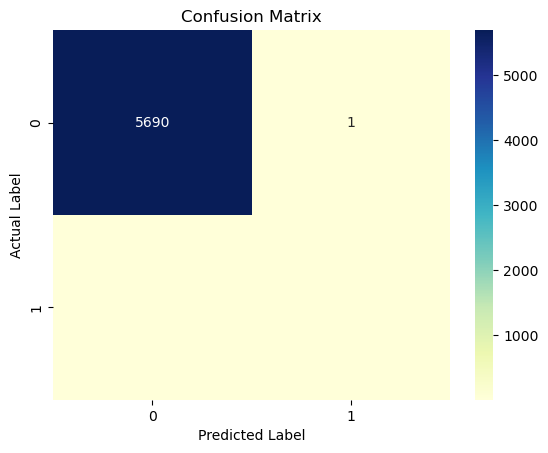

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5691
           1       0.83      0.83      0.83         6

    accuracy                           1.00      5697
   macro avg       0.92      0.92      0.92      5697
weighted avg       1.00      1.00      1.00      5697



In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

# Load the dataset
#data = pd.read_csv('dataset6.csv')  # Adjust path if needed

# Assuming the last column is the target and the rest are features
X = data6.iloc[:, :-1]
y = data6.iloc[:, -1]

# Split the data into training and testing sets
x_train_s, x_test, y_train_s, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Create the Random Forest Classifier with specified hyperparameters
rand_f = RandomForestClassifier(
    n_estimators=1000,
    min_samples_split=10,
    min_samples_leaf=1,
    max_features='auto',
    max_leaf_nodes=None,
    oob_score=True,
    n_jobs=-1,
    random_state=1
)

# Fit the model on the training data
rand_f.fit(x_train_s, y_train_s)

# Make predictions on the test set
y_pred = rand_f.predict(x_test)

# Generate the confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using seaborn's heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

# Print the classification report
print(classification_report(y_test, y_pred))


In [23]:
# Pseudocode:
# Combine the "grey area transactions" from non-fraudulent and fraudulent predictions
# Label them correctly using the original dataset
# Train a Random Forest classifier to distinguish between legitimate and fraudulent transactions

# Python code:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

# Identify "grey area transactions" as those where either model predicted -1
grey_area = data[(data['Grey_Non_Fraud'] == -1) | (data['Grey_Fraud'] == -1)]
print('done1')
grey_area.shape



# Labels for "grey area transactions"
Y_grey = grey_area['Class']
X_grey = grey_area.drop(['Time', 'Class', 'Grey_Non_Fraud', 'Grey_Fraud'], axis=1)
print('done2')
# Split the "grey area transactions" into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X_grey, Y_grey, test_size=0.2, random_state=42)

# Create the Random Forest Classifier with specified hyperparameters
random_forest = RandomForestClassifier(
    n_estimators=1000,
    min_samples_split=10,
    min_samples_leaf=1,
    max_features='auto',
    max_leaf_nodes=None,
    oob_score=True,
    n_jobs=-1,
    random_state=1
)
print('done3')
# Train the model
random_forest.fit(X_train, Y_train)
print('done4')
# Predict on the test set
rf_predictions = random_forest.predict(X_test)
print('done5')
# Evaluate the model
accuracy = accuracy_score(Y_test, rf_predictions)
print(f'Accuracy Score: {accuracy:.4f}')
print(classification_report(Y_test, rf_predictions))


done1
done2
done3


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


done4
done5
Accuracy Score: 0.9991
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5684
           1       0.71      0.62      0.67         8

    accuracy                           1.00      5692
   macro avg       0.86      0.81      0.83      5692
weighted avg       1.00      1.00      1.00      5692



In [25]:
import pandas as pd
from sklearn.metrics import classification_report, accuracy_score

# Load the new dataset
# Assuming the data is in a CSV file called 'new_creditcard_data.csv'
new_data = data6

# Prepare the feature matrix X by dropping the 'Time' and 'Class' columns
X_new = new_data.drop(['Time', 'Class'], axis=1)

# Prepare the true labels Y
Y_new = new_data['Class']

# Use the pre-trained Random Forest model to make predictions
# Make sure the pre-trained model is named `random_forest` and is already loaded
new_predictions = random_forest.predict(X_new)

# Calculate the accuracy score
new_accuracy = accuracy_score(Y_new, new_predictions)

# Generate a classification report
new_class_report = classification_report(Y_new, new_predictions)

# Print the results
print(f'Accuracy Score: {new_accuracy:.4f}')
print('Classification Report:')
print(new_class_report)


ValueError: The feature names should match those that were passed during fit.
Feature names seen at fit time, yet now missing:
- SVM_Fraud_Pred
- SVM_Predicted_Class


In [26]:
import pandas as pd
from sklearn.metrics import classification_report, accuracy_score

# Load the new dataset
new_data = data6

# Check if the expected features are present
expected_features = ['Feature1', 'Feature2', 'SVM_Fraud_Pred', 'SVM_Predicted_Class']  # add all other features used during training
missing_features = [f for f in expected_features if f not in new_data.columns]

if missing_features:
    raise ValueError(f'Missing features in the new dataset: {missing_features}')

# Prepare the feature matrix X by dropping the 'Time' and 'Class' columns
X_new = new_data.drop(['Time', 'Class'], axis=1)

# Prepare the true labels Y
Y_new = new_data['Class']

# Use the pre-trained Random Forest model to make predictions
new_predictions = random_forest.predict(X_new)

# Calculate the accuracy score
new_accuracy = accuracy_score(Y_new, new_predictions)

# Generate a classification report
new_class_report = classification_report(Y_new, new_predictions)

# Print the results
print(f'Accuracy Score: {new_accuracy:.4f}')
print('Classification Report:')
print(new_class_report)


ValueError: Missing features in the new dataset: ['Feature1', 'Feature2', 'SVM_Fraud_Pred', 'SVM_Predicted_Class']